Dessiner avec TikZ dans Jupyter
===============================

vous trouverez dans ce dossier différents outils permettant de représenter certains objets 
avec jupyter, latex ou dans des scripts python.

Plus particulièrement, ces objets disposent d'une méthode `toTikZ() -> str` renvoyant le code 
`tikz` représentant ces objets.

`tikz` est un paquetage permettant, avec `LaTeX`,  de dessiner.

# La classe `TikZ`

La classe `TikZ` fournie permet d'abstraire la compilation avec latex d'un objet
fournissant une méthode `toTikZ`.

Cette classe est située dans le module `tikz` :

In [1]:
from tikz import TikZ

Les objets de la classe `TikZ` prennent à la construction une chaine de caractères
contenant le code à compiler avec `tikz` et `LaTeX`. Ce code est compilé en un fichier
image `png`, qui peut-être affiché lorsque l'on se trouve sous jupyter :

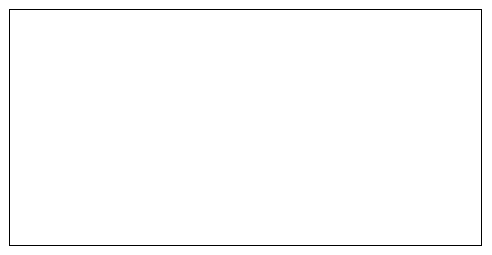

In [2]:
TikZ("\draw (0, 0) rectangle (8, 4);")

In [ ]:
TikZ("\draw (0,0) circle (1);")

pour plus d'information sur la syntaxe tikz, consultez le livre [tikz pour l'impatient](http://math.et.info.free.fr/TikZ/index.html).

# La classe `Dot`

La classe `Dot` permet d'abstraire l'utilisation du module `graphviz`. Ce module permet de visualiser des graphes.


# La classe BinaryTree

Dans le cadre de la correction du problème sur [les arbres de mots](./ds3.pdf), nous allons introduire une nouvelle classe `BinaryTree` 
permettant de représenter des arbres binaires.

Le constructeur de cette classe permet de 

- construire un arbre vide en étant utilisé sans paramètre ;
- construire un arbre non vide en spécifiant :

   - un noeud ;
   - un sous-arbre gauche :
   - un sous-arbre droit.
   
Les noeuds ne sont pas quelconque et doivent dériver de la classe `Node`. On fournit deux types de noeuds (pour l'instant) :

- les noeuds booléens (`BooleanTreeNode`) ;
- les noeuds préfixes (`PrefixTreeNode`).


In [ ]:
from tree import BinaryTree as BT, BooleanTreeNode as BN

In [ ]:
arbre = BT(BN(False), BT(BN(True), BT(), BT()),
             BT(BN(False), BT(),
                  BT(BN(True), BT(), BT())))

Les objets de la classe `Tree` disposent d'une méthode `to_tikz` permettant de récupérer le code tikz représentant l'arbre :

In [ ]:
arbre.to_tikz()

**Mieux** : la classe `Tree` fournie hérite de la classe abstraite `TikZAbstractExportable`.


Les objets de cette classe peuvent être passé en paramètre au constructeur `TikZ` :

In [ ]:
TikZ(arbre)

Le nombre de noeud peut être obtenu grace à la fonction `len` :

In [ ]:
len(arbre)

Voici les réponses aux premières question du problème *arbre de mots binaires* :

In [ ]:
def feuille() -> BT:
    """
    :return: une feuille de l'arbre
    """
    return BT(BN(True), BT(), BT())


def peigne_droit(n: int) -> BT:
    """
    :return: un arbre réduit représentant l'ensemble de mots {1^n}
    """
    if n == 0:
        res = feuille()
    else:
        res = BT(BN(False), BT(), peigne_droit(n-1))
    return res


def zeros_puis_uns(n: int) -> BT:
    """
    :param n: un entier positif
    :return: l'arbre réduit représentant les mots 0^p1^q avec p+q=n
    """
    if n == 1:
        return BT(BN(False),
                  feuille(),
                  feuille())
    else:
        gauche = zeros_puis_uns(n-1)
        droite = peigne_droit(n-1)
        return BT(BN(False), gauche, droite)

def k_uns(k: int, n: int) -> BT:
    """
    :param k: the number of '1' 
    :param n: the maximum length of words
    :return: a tree containing all words of length <= n with k '1'
    :CU: 0<=k<=n
    """
    if k == 0:
        res = feuille()
    elif k==n:
        res = BT(BN(False),
                   BT(),
                   k_uns(k-1, n-1)) 
    else:
        res = BT(BN(False),
                k_uns(k, n-1),
                k_uns(k-1, n-1))
    return res



In [ ]:
TikZ(feuille())

In [ ]:
TikZ(peigne_droit(5))

In [ ]:
TikZ(zeros_puis_uns(5))

Il existe différentes natures de noeud, héritant de la classe `Node`.


Les noeuds préfixes`PrefixNode` sont des noeuds booléens disposant d'un attribut supplément

# La classe `Tree`

La classe `Tree` permet de représenter des arbres d'arité quelconque. Un arbre est :

- soit l'arbre vide `Tree()` ;
- soit un couple `Tree(n: Node, sous_arbres: list[Tree])` où `n` est le noeud situé à la racine et où `sous_arbres` contient les sous-arbres.

In [ ]:
# construction d'un arbre aleatoire :
from random import randrange
from tree import Tree, Node

def arbre_aleat(hauteur: int, amax: int) -> Tree:
    if hauteur > 0:
        res = Tree()
        while res.height() != hauteur:
            arite = randrange(1, amax+1)
            res = Tree(Node(randrange(0, 10)),
                        [ arbre_aleat(hauteur - 1, amax)
                          for _ in range(arite) ])
        return res
    elif hauteur == 0:
        return Tree(Node(randrange(0, 10)),[])
    else:
        return Tree()

In [ ]:
a = arbre_aleat(2, 4)

In [ ]:
str(a)

In [ ]:
TikZ(a)

In [ ]:
from dot import Dot
Dot(a)